In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [228]:
data = pd.read_csv("Jamboree.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [229]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

##     1. Define Problem Statement and perform Exploratory Data Analysis 



         a) Definition of problem 

* This is a regression problem. We have multiple variables which contribute to the prediction of chance of admit. Therefore, this is a case of multiple regression.
* We preprocess the data then model the linear regression model and test the possible assumptions of the model,and make possible inferences about the data and the model and evaluate them accordingly.

    b) Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.

In [230]:
data.shape # Total no of rows : 500 Total no of columns 9

(500, 9)

In [231]:
data.dtypes
# All the attributes are either of type float or of type int
# The target variable is continuous float variable

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [232]:
data.nunique()
# This method returns the No of unique values in each of the attribute
# The attributes which are integer and have lesser unique values should be
# be considered as categorical values

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [233]:
data.isnull().sum()
# Since all the variables have zero null values. 
# We don't need to process these values separately 
# as part of preprocessing step. No Outliers have been detected 
# attribute level Outliers can be resolved by normalization of the data.

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [234]:
data.describe()
# This method returns the statistical summary of the data 
# Different Ranges of the attributes immplies that Normalization of the
# data before fitting the model is crusial for this data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


    c) Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
    Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.

### Univariate Analysis 

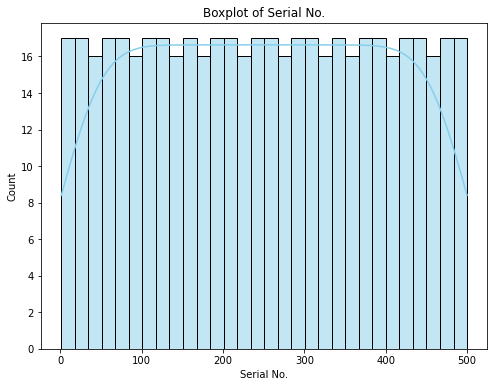

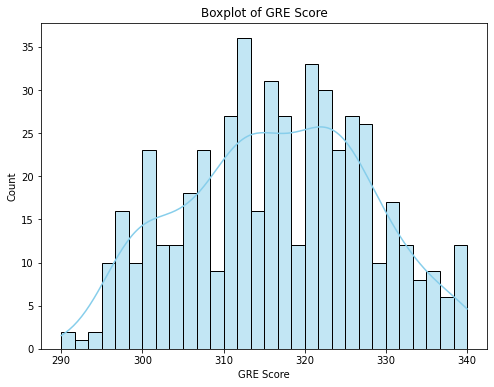

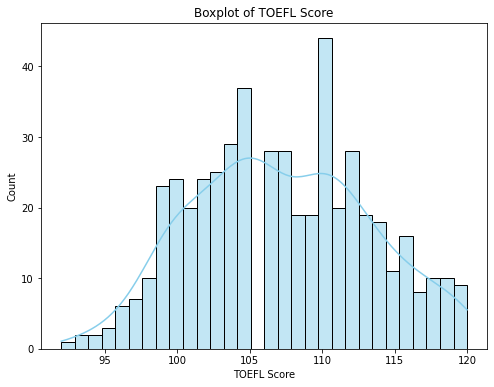

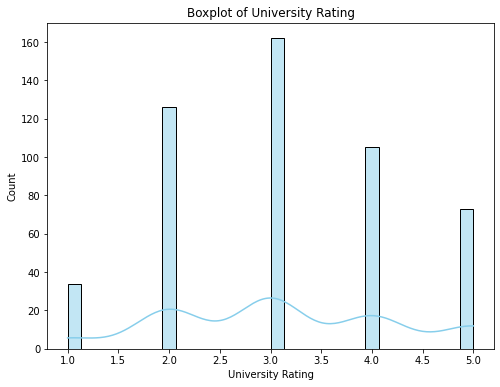

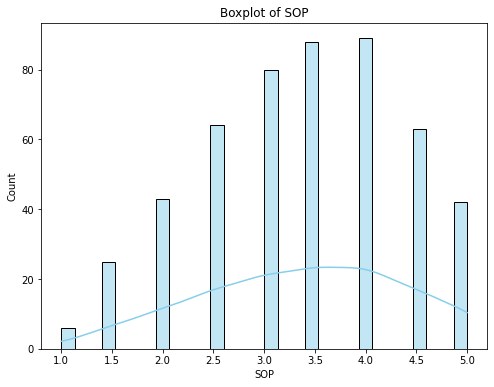

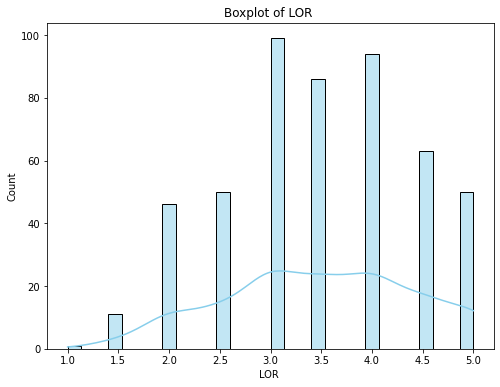

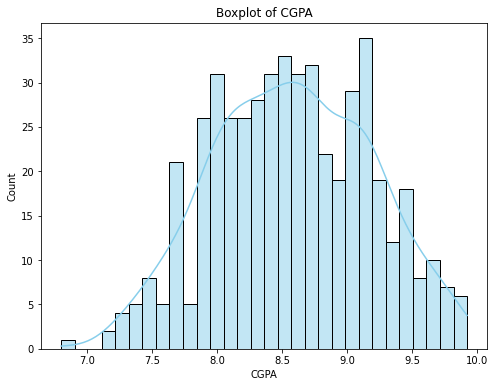

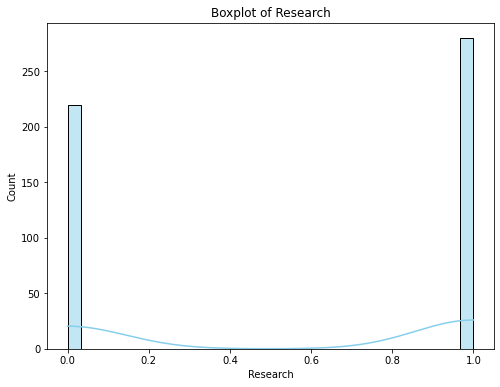

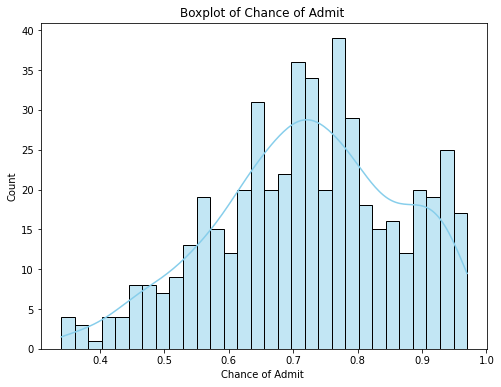

In [235]:
for i in data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[i], kde=True, bins=30, color='skyblue')
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

Except SOP all other histplots show that the attributes are following Normal Distributions therefore no special treatment is intended.

### Bivariate Analysis

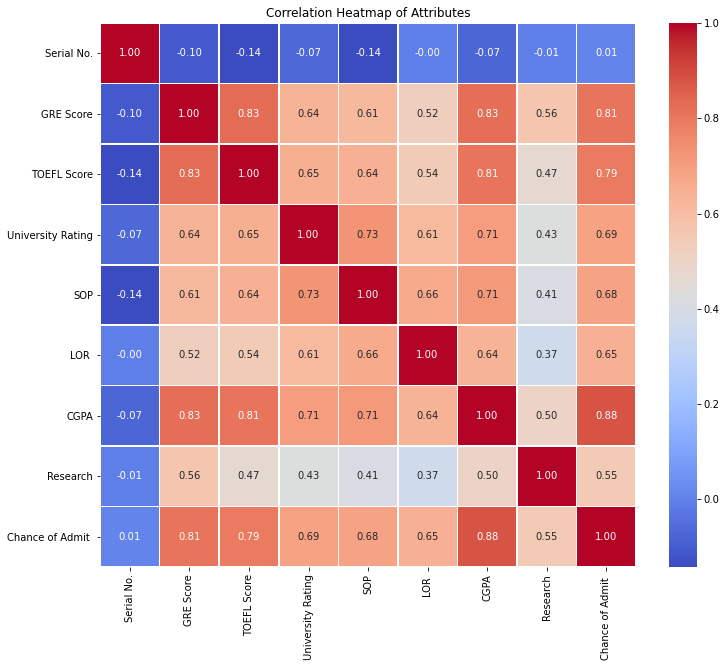

In [236]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Attributes')
plt.show()

'''

GRE Score, TOFEL Score, CGPA have stronger correlation 
with chance of admit.But we can observe that almost all the correlation
values are greater than 0.5 which suggests each of the variable is 
contributing in deciding the chance of admit. 

'''

    d) Illustrate the insights based on EDA
    
        - Comments on range of attributes, outliers of various attributes
        - Comments on the distribution of the variables and relationship between them
        - Comments for each univariate and bivariate plots

NOTE: All the necessary comments are added below each subsection of analysis

## Data Preprocessing 

### Duplicate value check

In [237]:
len(data[data.duplicated()]) 
# No of duplicated rows is zero therefore there is no need
# to remove any row

0

### Missing value treatment

In [238]:
data.isnull().sum()
# There are no missing values in any of the attributes present

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Outlier treatment

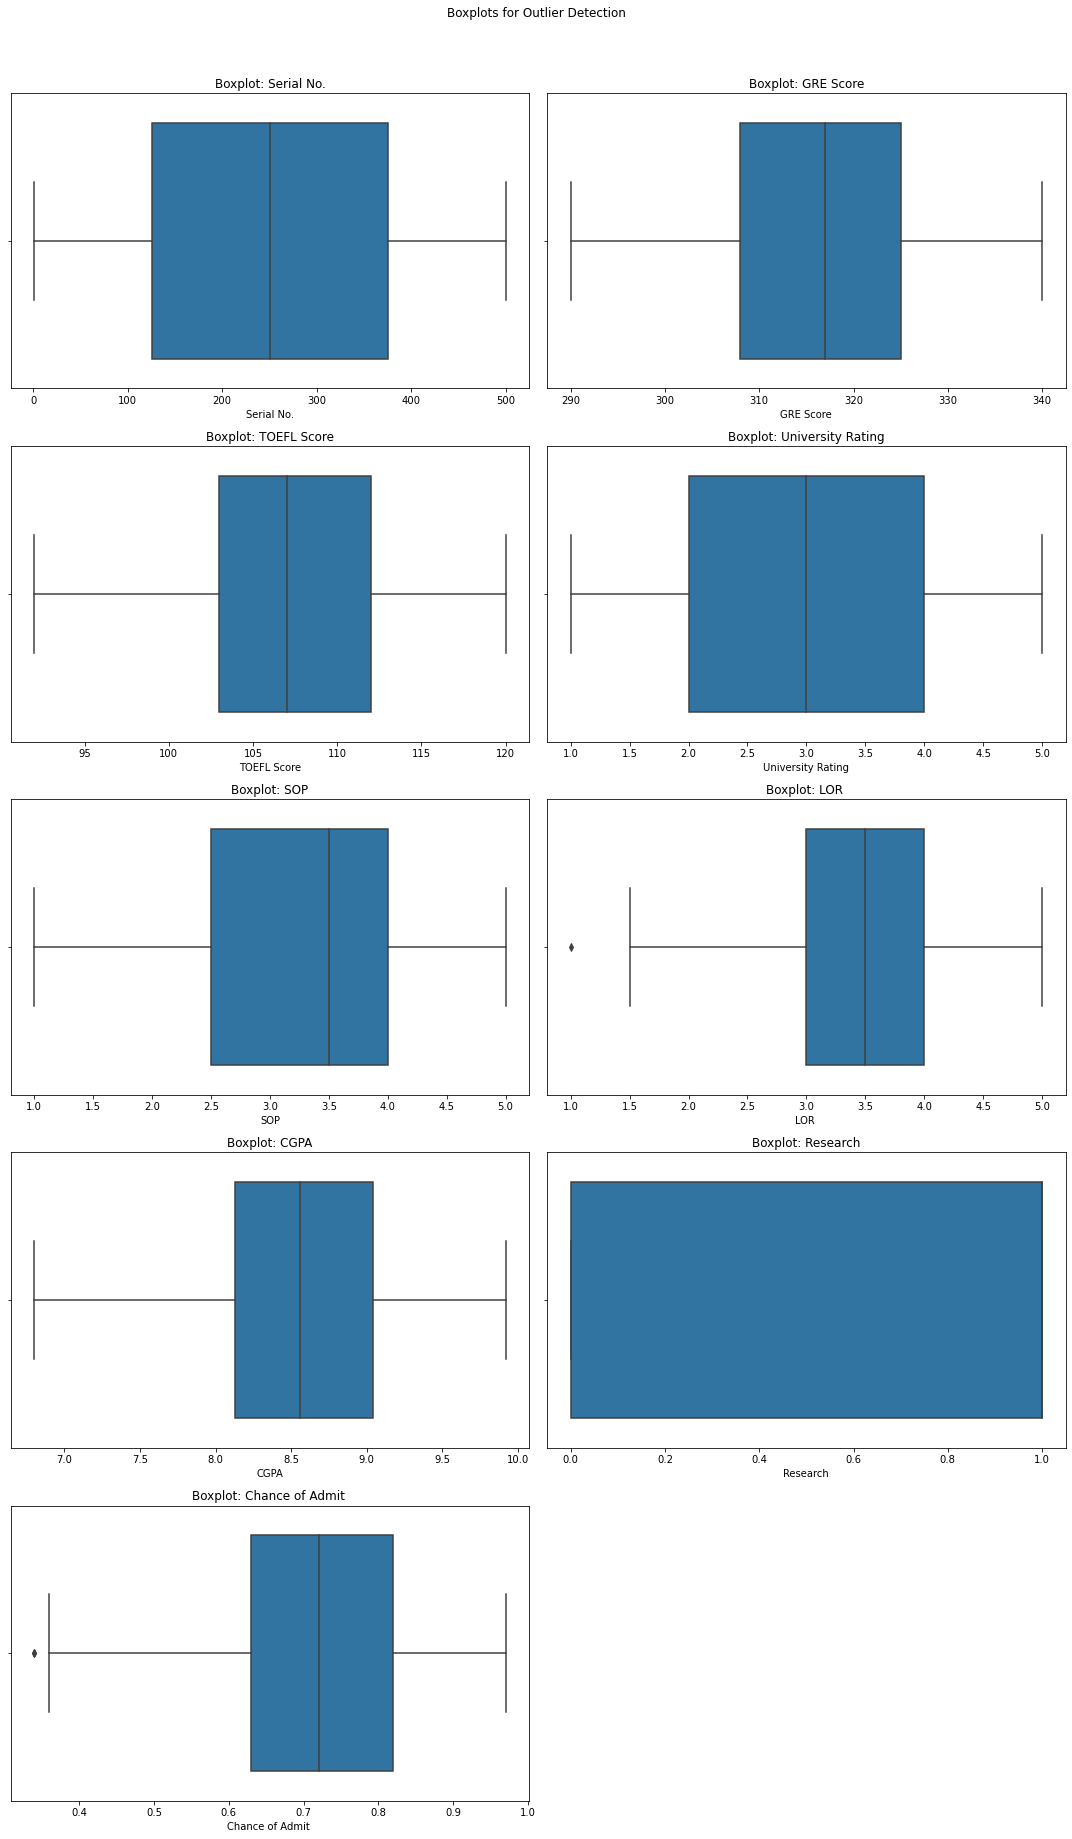

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
num_cols = len(data.columns)
num_rows = (num_cols + 1) // 2  # Ensure at least 2 rows

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Create boxplots for each selected column
for i, column in enumerate(data.columns):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot: {column}')

# Hide empty subplots
for j in range(num_cols, len(axes)):
    axes[j].axis('off')

plt.suptitle('Boxplots for Outlier Detection', y=1.02)
plt.tight_layout()
plt.show()

* There seems to be a single outlier in the entire data where the LOR is 1 and the chance of admit is zero. But it doesn't seem to be a technical or data error hence removel of the outlier record is not a suitable action to proceed

### Feature engineering & Data preparation for modeling

In [240]:
# Removing the Serial No attribute as it doesn't contribute any thing
data.drop(['Serial No.'],axis=1,inplace=True)

In [241]:
# Separating data and labels
X = data.drop(['Chance of Admit '],axis=1)
y = data['Chance of Admit ']

In [242]:
# Normalizing the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = X.columns
trans_X = pd.DataFrame(scaler.fit_transform(X),columns=columns)
trans_X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152


# Model building

    Build the Linear Regression model and comment on the model statistics

In [243]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,cross_val_predict

lr_reg = LinearRegression()

# Train the linear regression model on the entire dataset
lr_reg.fit(X, y)

# Access the coefficients and intercept of the best model
coef = lr_reg.coef_
intercept = lr_reg.intercept_

# Display the coefficients and intercept
print("Coefficients:", coef)
print("Intercept:", intercept)

# Print mean and standard deviation of cross-validated scores
score = cross_val_score(lr_reg, X, y, cv=10)
print("Mean Score:", score.mean())
print("Standard Deviation of Score:", score.std())

Coefficients: [0.00185851 0.00277797 0.00594137 0.00158614 0.01685874 0.11838505
 0.02430748]
Intercept: -1.2757250829969842
Mean Score: 0.8131223770253244
Standard Deviation of Score: 0.07783056953754525


In [244]:
pd.DataFrame(score).describe()

,0
count,10.000000
mean,0.813122
std,0.082041
min,0.634268
25%,0.773234
50%,0.818772
75%,0.873695
max,0.919606


Mean score of the model is 81% with a std of 0.08. Range of the scores is in \[0.63\-0.91\]

    Display model coefficients with column names

In [245]:
print(np.array([lr_reg.feature_names_in_,coef]).T)

[['GRE Score' 0.0018585064850102002]
 ['TOEFL Score' 0.0027779723914195635]
 ['University Rating' 0.005941368040176812]
 ['SOP' 0.0015861374557666085]
 ['LOR ' 0.016858742352418687]
 ['CGPA' 0.11838505345773817]
 ['Research' 0.024307478582166073]]


    Try out Ridge and Lasso regression

In [246]:
from sklearn.linear_model import Ridge,Lasso

In [247]:
lr_reg = Ridge()

# Use cross_val_predict to get predictions for each fold
y_pred = cross_val_predict(lr_reg, X, y, cv=10)

# Train the linear regression model on the entire dataset
lr_reg.fit(X, y)

# Access the coefficients and intercept of the best model
coef = lr_reg.coef_
intercept = lr_reg.intercept_

# Display the coefficients and intercept
print("Coefficients:", coef)
print("Intercept:", intercept)

# Print mean and standard deviation of cross-validated scores
score = cross_val_score(lr_reg, X, y, cv=10)
print("Mean Score:", score.mean())
print("Standard Deviation of Score:", score.std())

Coefficients: [0.00192642 0.0028528  0.00610918 0.0018758  0.01706317 0.11542975
 0.02407538]
Intercept: -1.2819740284655428
Mean Score: 0.813034910244318
Standard Deviation of Score: 0.07797287191930335


In [248]:
lr_reg = Lasso()

# Use cross_val_predict to get predictions for each fold
y_pred = cross_val_predict(lr_reg, X, y, cv=10)

# Train the linear regression model on the entire dataset
lr_reg.fit(X, y)

# Access the coefficients and intercept of the best model
coef = lr_reg.coef_
intercept = lr_reg.intercept_

# Display the coefficients and intercept
print("Coefficients:", coef)
print("Intercept:", intercept)

# Print mean and standard deviation of cross-validated scores
score = cross_val_score(lr_reg, X, y, cv=10)
print("Mean Score:", score.mean())
print("Standard Deviation of Score:", score.std())

Coefficients: [0.00227197 0.         0.         0.         0.         0.
 0.        ]
Intercept: 0.002725982573632657
Mean Score: 0.214816426894291
Standard Deviation of Score: 0.08527426311248522


Rasso could able to enhance in terms of the std of the scores where as Lasso miserably failed to fit properly.

## Testing the assumptions of the linear regression model

* Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5) (10 Points)

In [249]:
def vif(data):
    lr_reg = LinearRegression()
    lr_reg.fit(data, y)
    r_squared = r2_score(y,lr_reg.predict(data))
    vif = 1 / (1 - r_squared)
    return vif
    
def calc_vif():
    for i in data.columns:
        vif_score = vif(data.drop(i,axis=1))
        print(i,vif_score)
        if vif_score>5:
            data.drop(i,axis=1,inplace=True)
    
data = X
target = y
calc_vif()

GRE Score 5.462855234031056
TOEFL Score 5.154420732710523
University Rating 5.097402281547037
SOP 5.066723100024309
LOR  4.8300353906353495
CGPA 2.1045255780664416
Research 4.766805094002033


In [250]:
data

,LOR,CGPA,Research
0,4.5,9.65,1
1,4.5,8.87,1
2,3.5,8.00,1
3,2.5,8.67,1
4,3.0,8.21,0
...,...,...,...
495,4.0,9.02,1
496,5.0,9.87,1
497,5.0,9.56,1
498,5.0,8.43,0


* The mean of residuals is nearly zero (10 Points)
* Linearity of variables (no pattern in the residual plot) (10 Points)

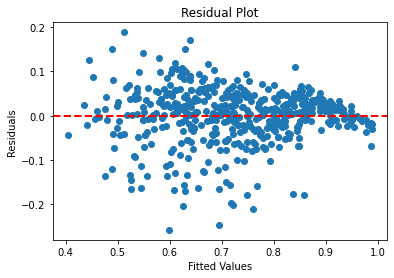

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

lr_reg = LinearRegression()
lr_reg.fit(X, y)
y_pred = lr_reg.predict(X)
residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [252]:
from scipy.stats import shapiro, ttest_1samp

# Shapiro-Wilk test for normality
_, p_value_shapiro = shapiro(residuals)
print(f'Shapiro-Wilk p-value: {p_value_shapiro}')

# t-test for the mean of residuals
_, p_value_ttest = ttest_1samp(residuals, 0)
print(f't-test p-value: {p_value_ttest}')

Shapiro-Wilk p-value: 1.3115985077541414e-12
t-test p-value: 0.9999999999998698


In [253]:
residuals.describe()

count    5.000000e+02
mean    -4.597434e-16
std      6.270292e-02
min     -2.578812e-01
25%     -2.551549e-02
50%      7.308797e-03
75%      3.760494e-02
max      1.886331e-01
Name: Chance of Admit , dtype: float64

    The Shapiro-Wilk test suggests non-normality of residuals (p-value: 1.31e-12), while the t-test indicates that the mean of residuals is not significantly different from zero (p-value: 1.0). Consider the non-normality result in the context of the analysis.

* Test for Homoscedasticity (10 Points)

In [254]:
from statsmodels.stats.diagnostic import het_goldfeldquandt
gq_test_stat, gq_p_value, _ = het_goldfeldquandt(residuals, X)
print(f"Goldfeld-Quandt test p-value: {gq_p_value}")

Goldfeld-Quandt test p-value: 0.9999998578064505


    The Goldfeld-Quandt test yields a p-value of approximately 1.0, indicating no significant evidence against the assumption of homoscedasticity in the model. This suggests that the variance of residuals remains relatively constant across different levels of the independent variable(s).

* Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line) (10 Points)

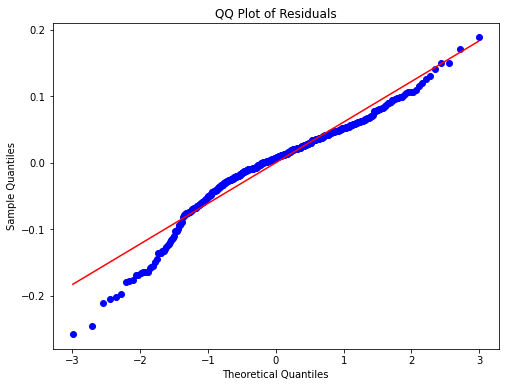

In [255]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Assuming 'residuals' is your array of residuals
_, ax = plt.subplots(figsize=(8, 6))

# Create a QQ plot
probplot(residuals, plot=ax, fit=True)

# Set plot labels and title
ax.set_title('QQ Plot of Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')

plt.show()

    Since, QQ Plot Points Align with the Line:
    Indicates that the residuals follow a normal distribution.

## Model performance evaluation

Metrics checked - MAE, RMSE, R2, Adj R2

In [256]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = lr_reg.predict(X)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# R-squared (R2)
r2 = r2_score(y, y_pred)
print(f'R-squared (R2): {r2}')

# Adjusted R-squared (Adjusted R2)
n = len(y)  # Number of observations
p = X.shape[1]   # Number of predictors/features (including intercept if present)

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared (Adjusted R2): {adjusted_r2}')


Mean Absolute Error (MAE): 0.04544062797124104
Root Mean Squared Error (RMSE): 0.06264018641455692
R-squared (R2): 0.8026337772444675
Adjusted R-squared (Adjusted R2): 0.8014400299294139


Train and test performances are checked

In [257]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label = train_test_split(X,y,test_size=0.2)
lr_reg = LinearRegression()
lr_reg.fit(train_data, train_label)
y_pred = lr_reg.predict(test_data)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test_label, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_label, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# R-squared (R2)
r2 = r2_score(test_label, y_pred)
print(f'R-squared (R2): {r2}')

# Adjusted R-squared (Adjusted R2)
n = len(y)  # Number of observations
p = X.shape[1]   # Number of predictors/features (including intercept if present)

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared (Adjusted R2): {adjusted_r2}')

Mean Absolute Error (MAE): 0.04333658979076691
Root Mean Squared Error (RMSE): 0.06097143188582047
R-squared (R2): 0.8102707283171227
Adjusted R-squared (Adjusted R2): 0.8091231722383956


Comments on the performance measures and if there is any need to improve the model or not

* There is no much difference between the test and train performance of the model this emphasis that model is well generalized

# Actionable Insights & Recommendations

    Comments on significance of predictor variables

* The VIF scores for GRE Score, TOEFL Score, University Rating, SOP, LOR, and Research indicate moderate multicollinearity.
* CGPA has a lower VIF, suggesting lower multicollinearity.
* The linear regression coefficients provide insights into the strength and direction of the relationship between each variable and the dependent variable.
* Consider addressing multicollinearity, if deemed problematic, by potentially excluding correlated variables or using regularization techniques. The substantial impact of CGPA on the dependent variable is noteworthy.

    Comments on additional data sources for model improvement, model implementation in real world, potential business benefits from improving the model 

* Data Enhancement:
    Incorporate additional data such as work experience, publication records, and industry certifications to enhance the model's predictive capabilities for graduate admissions.

* Real world Implementation:
    Deploy the model in the admissions process to automate initial screenings, improve efficiency, and integrate seamlessly with existing university systems.

* Continuous Improvement:
    Establish a feedback loop for regular model reviews by admissions officers, ensuring ongoing refinement and scalability to handle high application volumes.

* Business Benefits:
    Realize efficiency gains, enhance decision-making, optimize resource allocation, gain a competitive edge, promote diversity and inclusion, and leverage data-driven insights for strategic planning.

* Ethical Considerations:
    Prioritize ethical implications, transparency, and fairness in model implementation, addressing biases and promoting diversity in university admissions.